In [73]:
import numpy as np
import matplotlib.pyplot as plt
import Modules.SQcircuit_extensions as sq_ext
import Modules.Fits as fits
from scipy.optimize import minimize
import os
import importlib

importlib.reload(sq_ext)
importlib.reload(fits)

data_dir = r'/data'
opt_dir = r'/opt_results/'

In [2]:
GHz = 1e9

# Single circuit

## Qubit 1 [ Cooldown 1 ]

In [3]:
experiment_name = 'qubit_1_single_1'
load = True


### Load spectral data and theoretical model

In [4]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [5]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [6]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)
I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

### Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

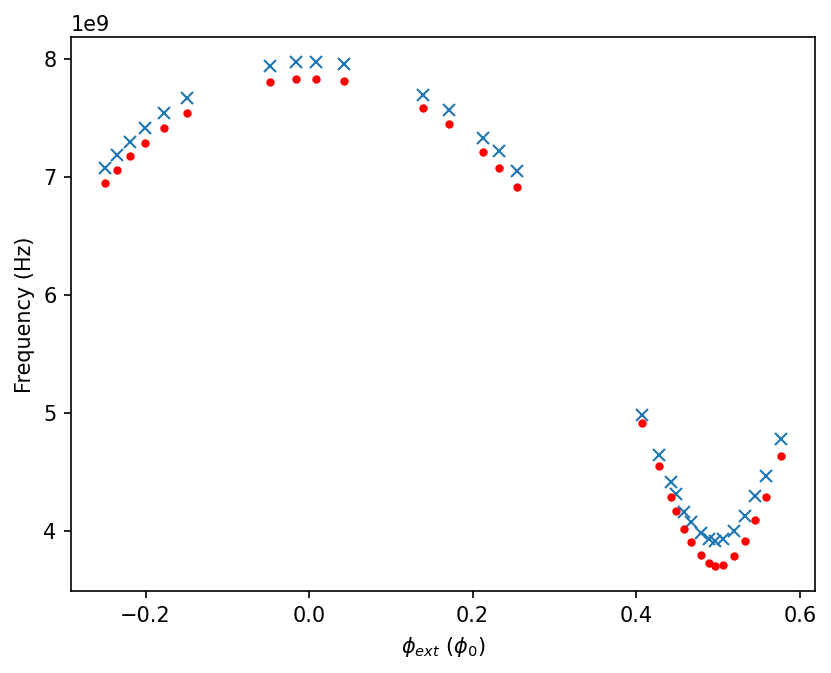

In [7]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


### Optimize or load previous optimization

In [8]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, tol = 1e-12).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [9]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 2.6900e+01
LF_1 = 2.6500e+01
EJ_1 = 5.4000e+00
I0 = 3.1700e-03
I_origin = -1.9350e-03


Optimized parameters 

CF_1 = 2.6202e+01
LF_1 = 2.5787e+01
EJ_1 = 5.3229e+00
I0 = 3.1639e-03
I_origin = -1.9380e-03


### Plot fits and errors

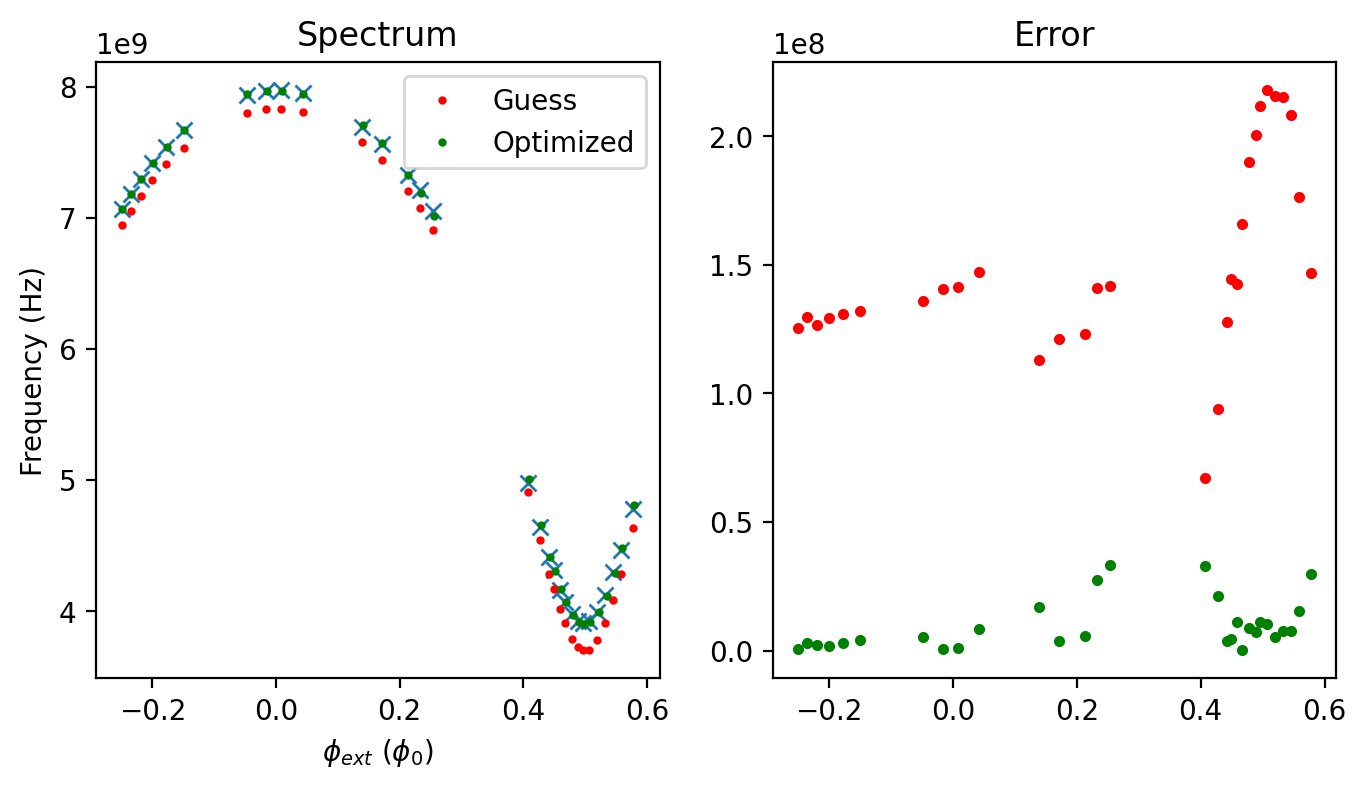

In [10]:
φ_ext_opt, ω_opt   = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp     , 'x')
ax1.plot(φ_ext_guess, ω_guess   , 'r.', markersize=4, label='Guess')
ax1.plot(φ_ext_opt  , ω_opt     , 'g.', markersize=4, label='Optimized')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax1.set_title('Spectrum')
ax1.legend()
ax2.set_title('Error')

ax2.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.')
ax2.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.')

## Resonator 1 [ Cooldown 1 ]

In [11]:
experiment_name = 'resonator_1_single_1'
load = True


### Load spectral data and theoretical model

In [115]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [116]:
CF_1, LF_1, EJ_1, I0_guess, I_origin_guess = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']

Δ = 1
LR = 95.1
CR = 6.07
crossing_index_1 = 11
crossing_index_2 = 10
nmax_r=5
nmax_f=15

data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1, EJ_1, nmax_r, nmax_f ])
parameters_guess = [CR, LR, Δ, I0_guess, I_origin_guess]

parameter_names = ['CR_1', 'LR_1', 'Delta', 'I0', 'I_origin']
bounds = ((2,25), (30,170), (0,2), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))

### Plot guess to check

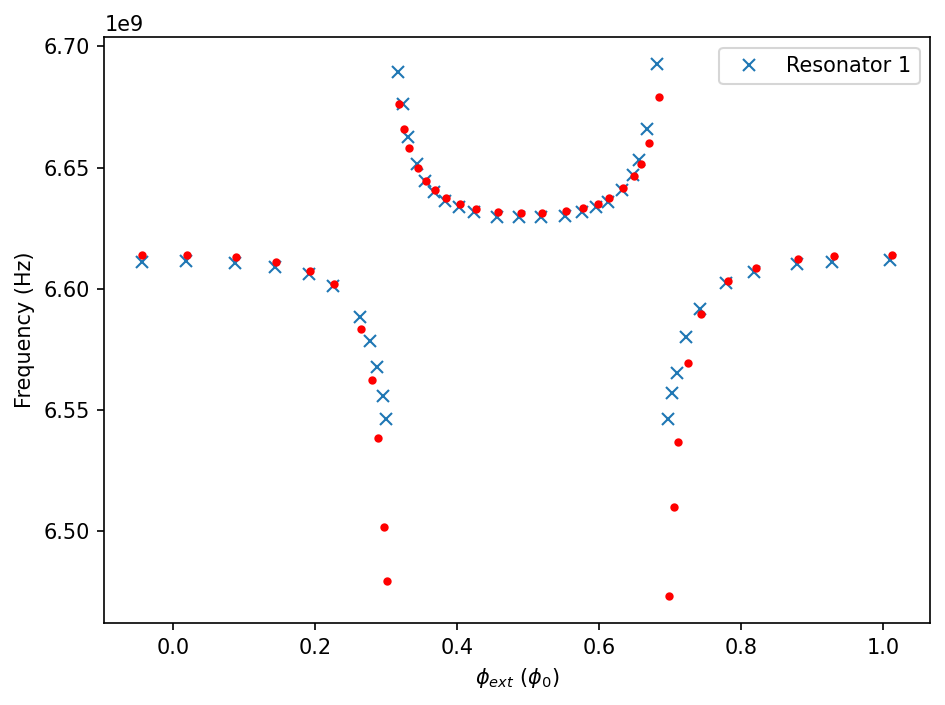

In [117]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

### Optimize or load previous optimization

In [118]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, tol = 1e-12).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.017597973184200474
0.01759797513707699
0.017597973305173497
0.017597973881930774
0.01760013657618813
0.01759780126391813
0.5402430014963895
0.5402429523509263
0.5402429984604594
0.5402430014287344
0.5402410308472059
0.5402349216038547
0.012508002545680389
0.012508000189444871
0.012508002393082668
0.012508003054632105
0.0125101014722183
0.012509407444683715
0.26422922804402044
0.26422922040039404
0.2642292275472847
0.2642292302361693
0.2641977162012674
0.26415580397224203
0.011849630486234719
0.011849627787962757
0.011849630312066001
0.011849630960106309
0.011849921484242397
0.011847708762732856
0.011411776530263746
0.011411774091307133
0.01141177637253352
0.011411777008102444
0.01141247750118356
0.011410636198737728
0.010132331656320251
0.010132329843586831
0.010132331538430855
0.010132332126242646
0.010133747055786584
0.010132650145488496
0.00771914935984037
0.007719148430192193
0.007719149298366242
0.007719149782257127
0.0077210832971522795
0.0077208109425062075
0.00393684208596845

In [119]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CR_1 = 6.0700e+00
LR_1 = 9.5100e+01
Delta = 1.0000e+00
I0 = 3.1639e-03
I_origin = -1.9380e-03


Optimized parameters 

CR_1 = 6.0759e+00
LR_1 = 9.5101e+01
Delta = 9.4623e-01
I0 = 2.9876e-03
I_origin = -1.8494e-03


### Plot fits and errors

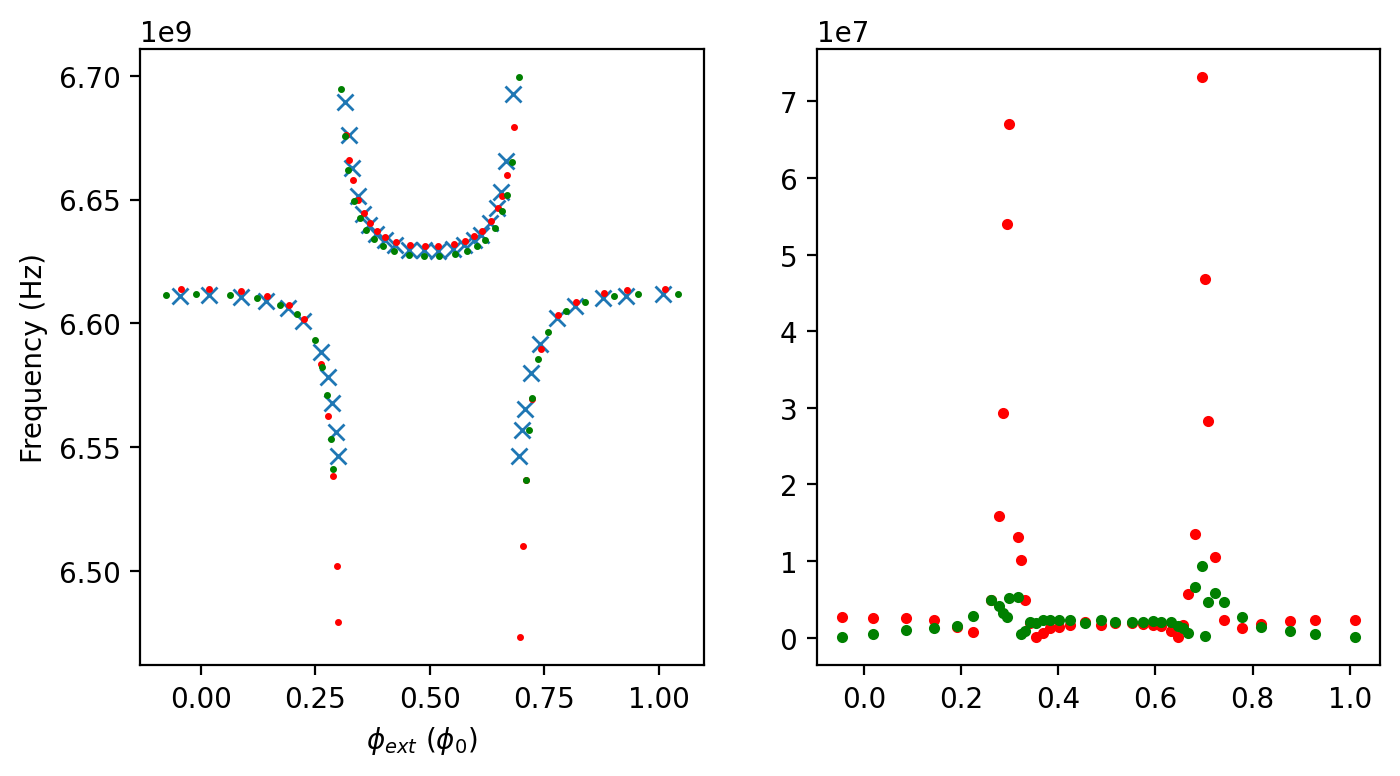

In [120]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r', markersize=3)
ax1.plot(φ_ext_opt  , ω_opt, 'g.', markersize=3)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_guess - ω_exp), 'r.')
ax2.plot(φ_ext_exp, np.abs(ω_opt   - ω_exp), 'g.')

## Qubit 1 and Resonator 1 [Cooldown 1]

In [133]:
experiment_name = 'resonator_and_qubit_1_single_1'


### Load spectral data and theoretical model

In [134]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [135]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [136]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']

crossing_index_1_F = 15
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.9, I0_F_1*1.1), (I_origin_F_1*1.1, I_origin_F_1*0.9), 
          (2,25), (30,170), (0,2), (I0_R_1*0.9, I0_R_1*1.1), (I_origin_R_1*1.1, I_origin_R_1*0.9))

### Plot guess to check

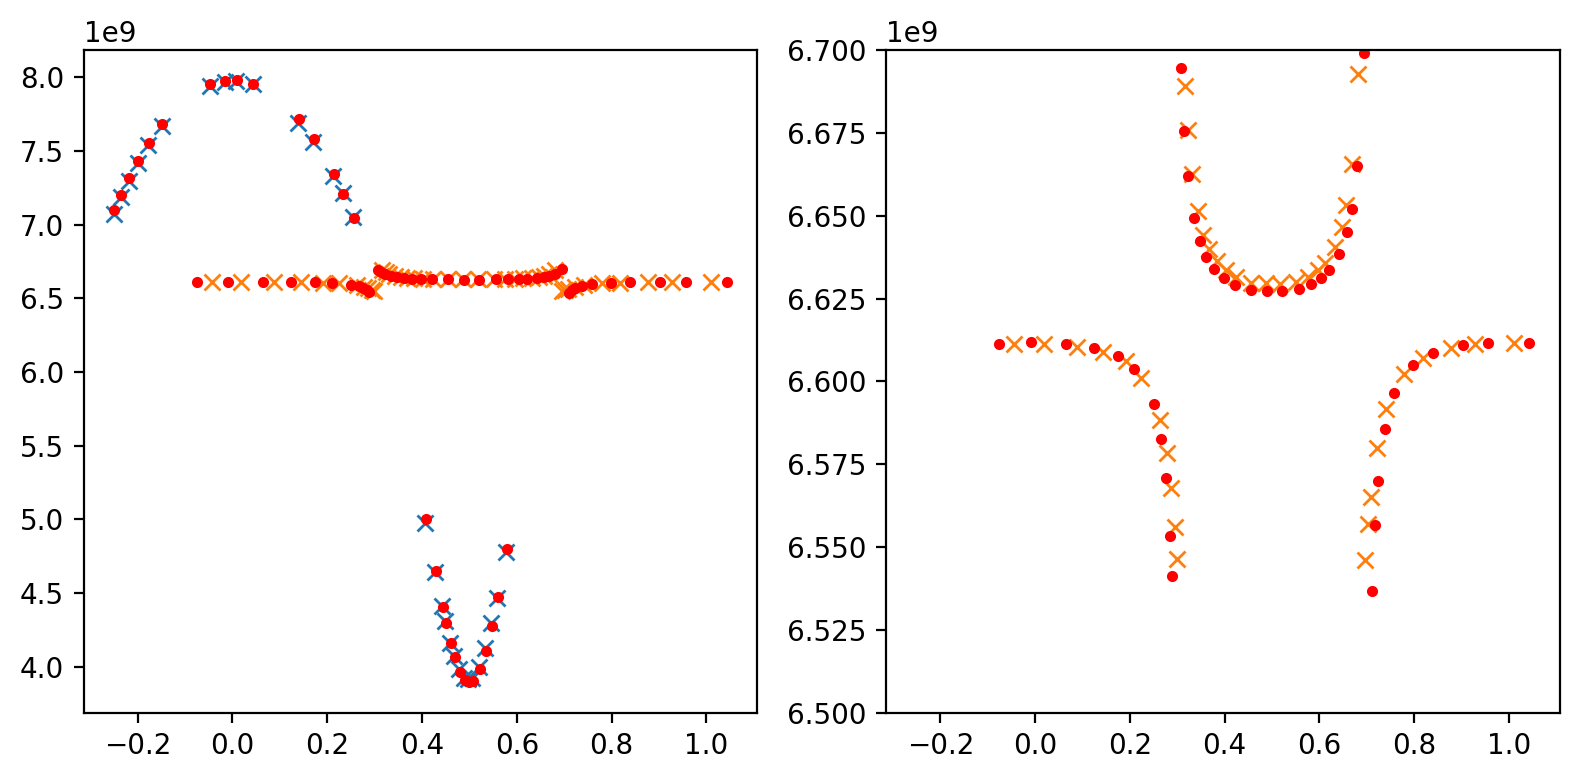

In [138]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
fig.tight_layout()

### Optimize or load previous optimization

In [139]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, tol = 1e-12).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.007495604444036326
0.0074956041312105376
0.007495604441043572
0.007495606603920654
0.007497051162936589
0.007493480540260292
0.00749560440246219
0.0074956044406780335
0.007495604584456047
0.0074956044962736544
0.007495604629770389
11.336590784472246
11.336590781325093
11.336590782333197
11.336590786595632
11.336674550806983
11.336212939567073
11.336590804288354
11.336590785734861
11.336590785374636
11.336220505832978
11.335826423079123
0.006507663898669275
0.006507663622486189
0.00650766388925448
0.006507665776338299
0.006509770087951155
0.006509246691199921
0.006507663852108675
0.006507663895138133
0.006507664009953458
0.006507343686466351
0.0065070505598198046
0.006627883859580968
0.0066278837014490995
0.006627883896596262
0.006627885255855393
0.0066242639405203925
0.006620641790592027
0.006627883810396799
0.006627883856049516
0.006627883937160578
0.006626990000483356
0.006626158724178611
0.006067734183088001
0.006067733962665564
0.006067734195775035
0.006067735834003619
0.00606715

In [140]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 26.202
LF_1 = 25.787
EJ_1 = 5.323
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 6.076
LR_1 = 95.101
Δ_1 = 0.946
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 26.206
LF_1 = 25.787
EJ_1 = 5.289
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 6.077
LR_1 = 95.101
Δ_1 = 0.944
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6500000000.0, 6700000000.0)

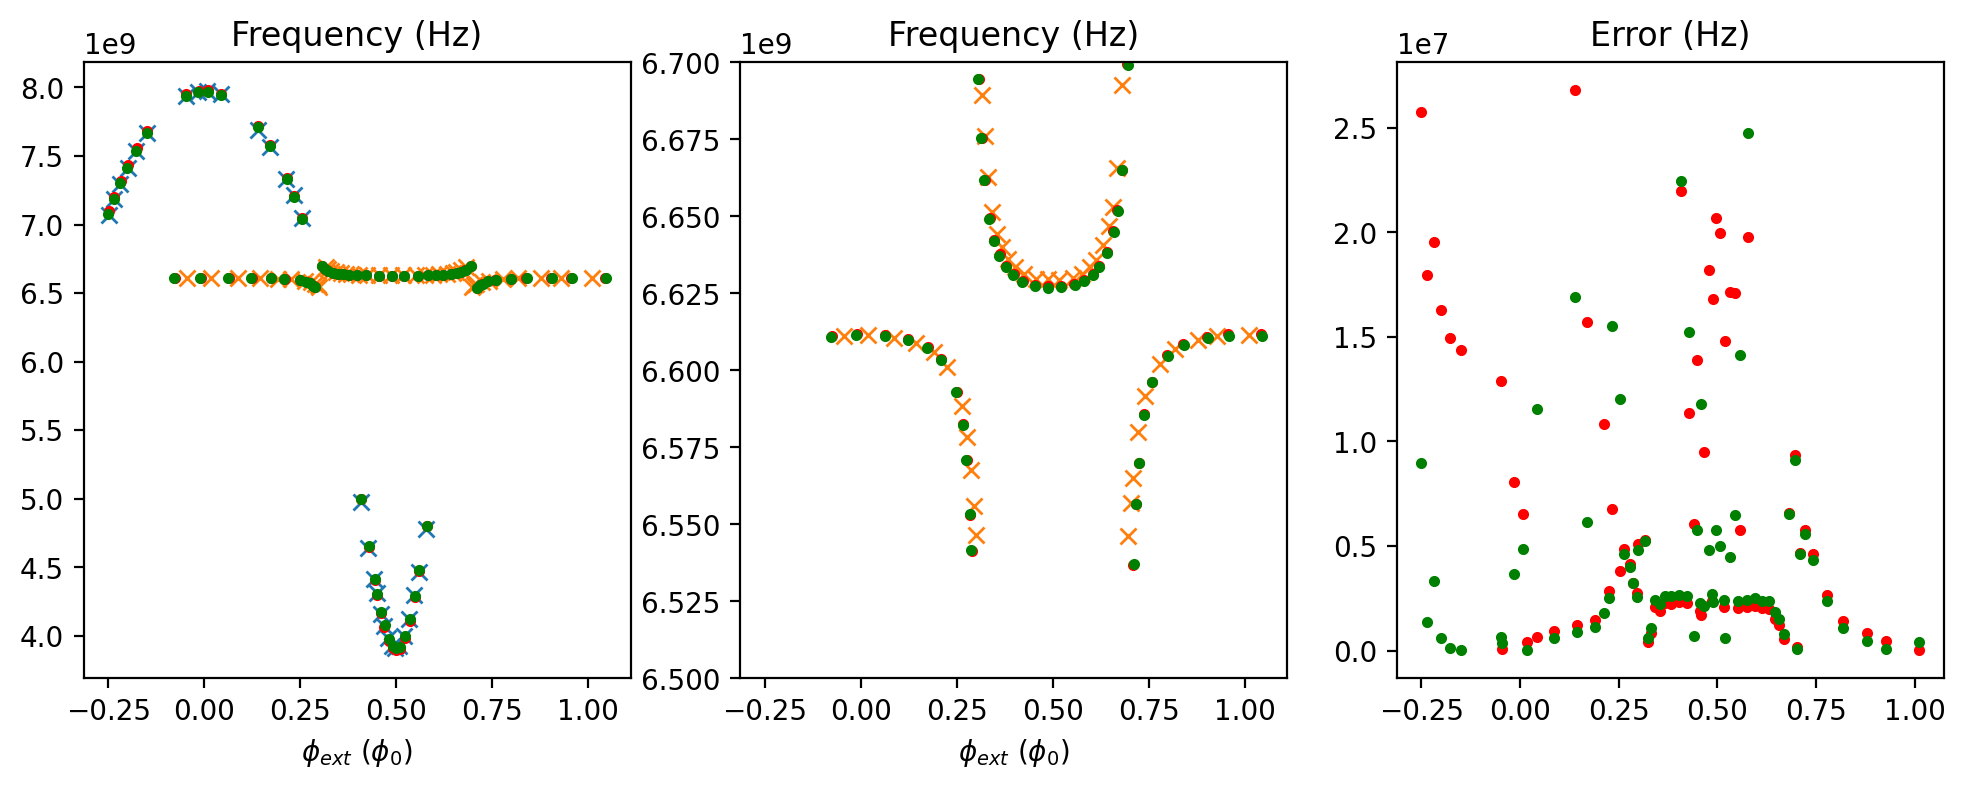

In [142]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.')
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.')
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.')
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.')
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])


## Qubit 1 and Resonator 1 [Cooldown 2]

In [161]:
experiment_name = 'resonator_and_qubit_1_single_2'
load = False


### Load spectral data and theoretical model

In [162]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [163]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [164]:
CF_1, LF_1, EJ_1, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

I0_F_1 = I0_F
I_origin_F_1 = Iss_F - I0_F/2

I0_R_1 = I0_R
I_origin_R_1 = Iss_R - I0_R/2

crossing_index_1_F = 15
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.9, I0_F_1*1.1), (I_origin_F_1*1.1, I_origin_F_1*0.9), 
          (2,25), (30,170), (0,2), (I0_R_1*0.9, I0_R_1*1.1), (I_origin_R_1*1.1, I_origin_R_1*0.9))

### Plot guess to check

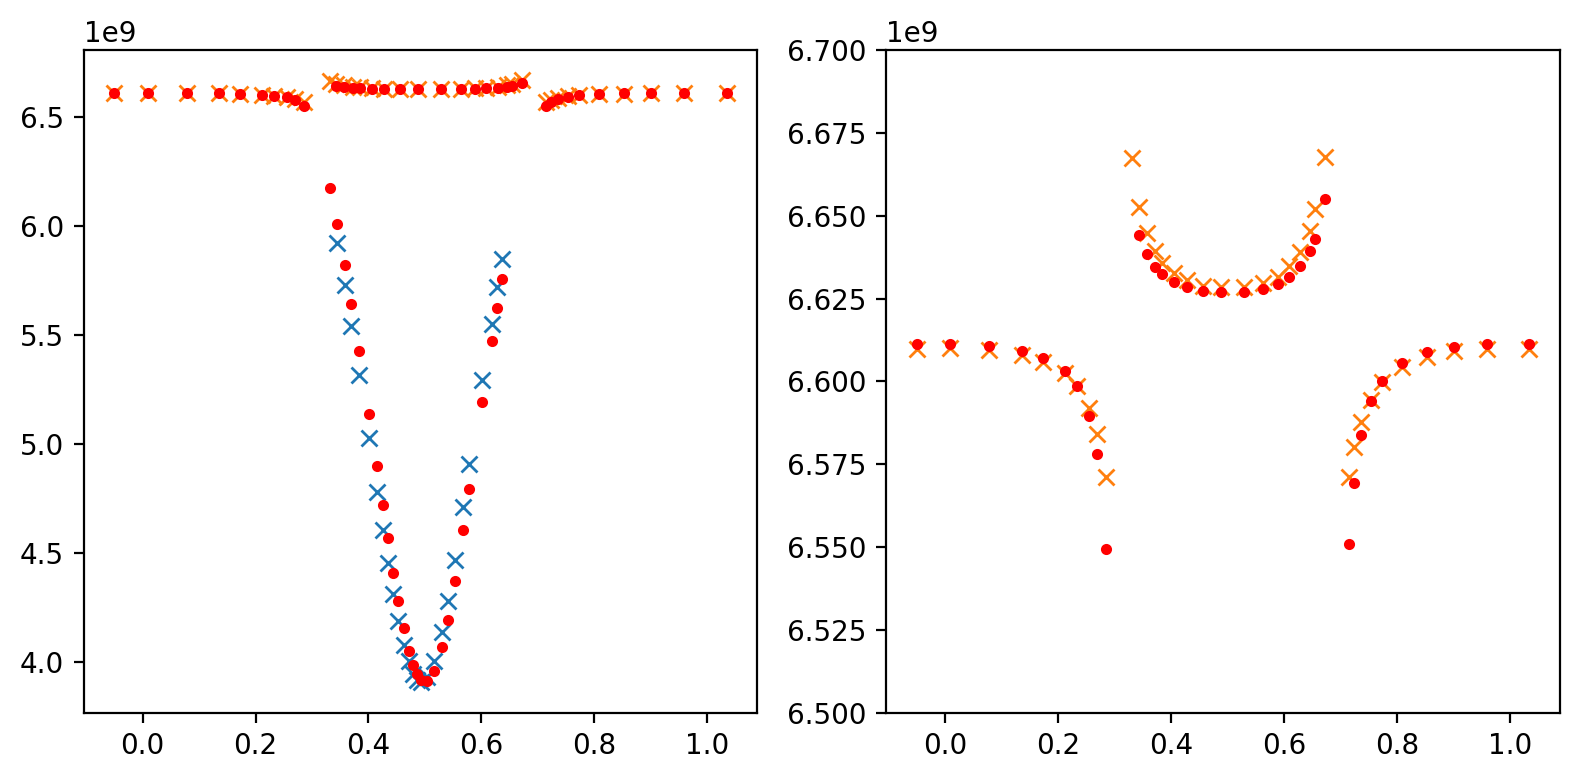

In [165]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
fig.tight_layout()

### Optimize or load previous optimization

In [166]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, tol = 1e-12).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.44422142421835153
0.44422142462451364
0.444221424274606
0.4442214217465844
0.44431740929521824
0.4444193728420515
0.4442214256458108
0.4442214243071138
0.4442214247045838
0.4442092941965883
0.4441840974800466
17.55432904075435
17.55432903673474
17.55432904306397
17.554329087120617
17.553391768460266
17.552647737496187
17.554328996566465
17.554329038030957
17.554329033524397
17.554222189139303
17.554163517633
0.20111436737922805
0.20111436773335006
0.201114367548962
0.20111436621890255
0.201116488996023
0.20112622304474495
0.20111436622502846
0.20111436730321516
0.2011143678711516
0.2011051291309871
0.20108442156421788
0.18779061658292467
0.18779061687930967
0.1877906167372451
0.18779061578505477
0.18778031040567672
0.18777853583692722
0.18779061491847562
0.1877906164744318
0.18779061708524708
0.18778266481508774
0.1877636605660333
0.16580094032673656
0.16580094052785588
0.16580094043286753
0.16580093997642184
0.16578179153862158
0.16577266198797982
0.16580093791687298
0.1658009401705

In [167]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 26.206
LF_1 = 25.787
EJ_1 = 5.289
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 6.077
LR_1 = 95.101
Δ_1 = 0.944
I0_R_1 = 0.003
I_origin_R_1 = -0.000


Optimized parameters 

CF_1 = 26.039
LF_1 = 25.635
EJ_1 = 5.416
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 6.070
LR_1 = 95.101
Δ_1 = 0.791
I0_R_1 = 0.003
I_origin_R_1 = -0.000


### Plot fits and errors

(6500000000.0, 6700000000.0)

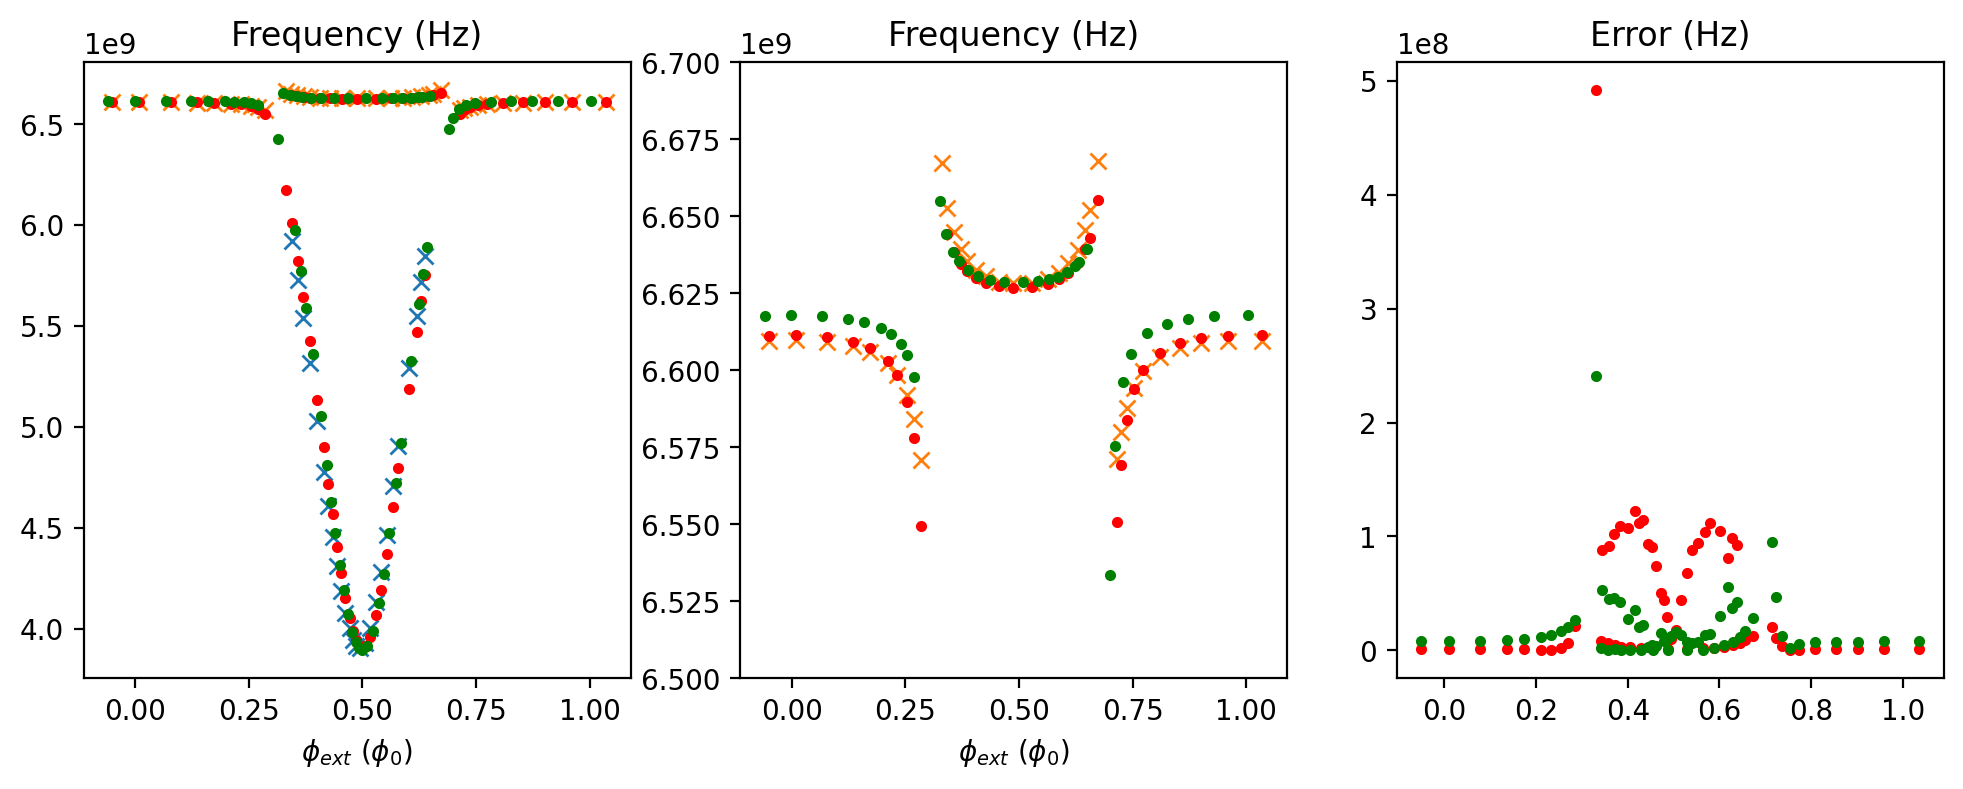

In [168]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.')
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.')
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.')
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.')
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])


# Qubit 1

In [19]:
experiment_name = 'qubit_1'
load = False


### Load spectral data and theoretical model

In [20]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [21]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [38]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)
I0_guess = I0
I_origin_guess = Iss - I0/2
# LF_1= 22.06 #nH
# CF_1= 32.15 #fF
# EJ_1= 6.19 #GHz

parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

## Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

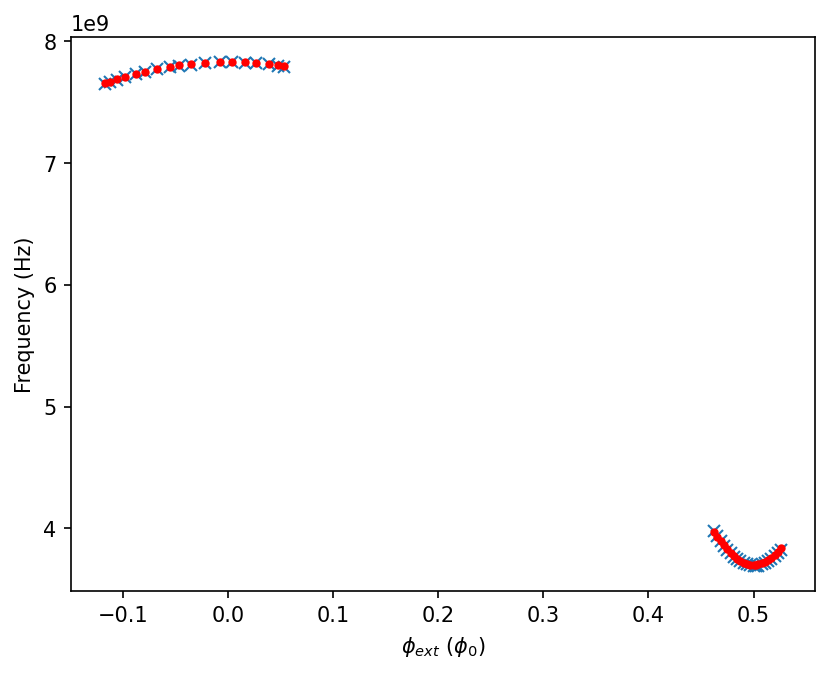

In [39]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_exp, 'x')
ax1.plot(φ_ext_exp, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


## Optimize or load previous optimization

In [40]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, tol = 1e-12).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.00154443486022662
0.0015444344461360273
0.0015444343591362992
0.0015444341911194106
0.0015432243983818914
0.00154170694741969
32.34757985074968
32.34757980754253
32.347579806194844
32.34757987771977
32.346527954493006
32.34493590601784
0.0014225152005053903
0.0014225147790802744
0.0014225146857884982
0.0014225144899927332
0.0014219851829953382
0.0014212084303219566
0.0013756393473797336
0.0013756389177062484
0.0013756388179712543
0.0013756385947185292
0.0013758343572676727
0.0013758458479309816
0.0013730730248714715
0.0013730725949598224
0.001373072495543322
0.001373072274456786
0.001373287427842667
0.0013733167206995869
0.0013635475623939954
0.0013635471315194758
0.0013635470333959714
0.001363546820958242
0.0013638395055809403
0.0013639399983006936
0.0012631961690066648
0.0012631957319999849
0.001263195658759278
0.001263195598618406
0.0012639598136787852
0.0012643824075298216
0.001175403716982163
0.0011754032794380567
0.0011754032410673907
0.0011754033847557657
0.0011762595224107705

In [41]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 26.900
LF_1 = 26.500
EJ_1 = 5.400
I0 = 0.003
I_origin = -0.002


Optimized parameters 

CF_1 = 26.924
LF_1 = 26.523
EJ_1 = 5.404
I0 = 0.003
I_origin = -0.002


## Plot fits and errors

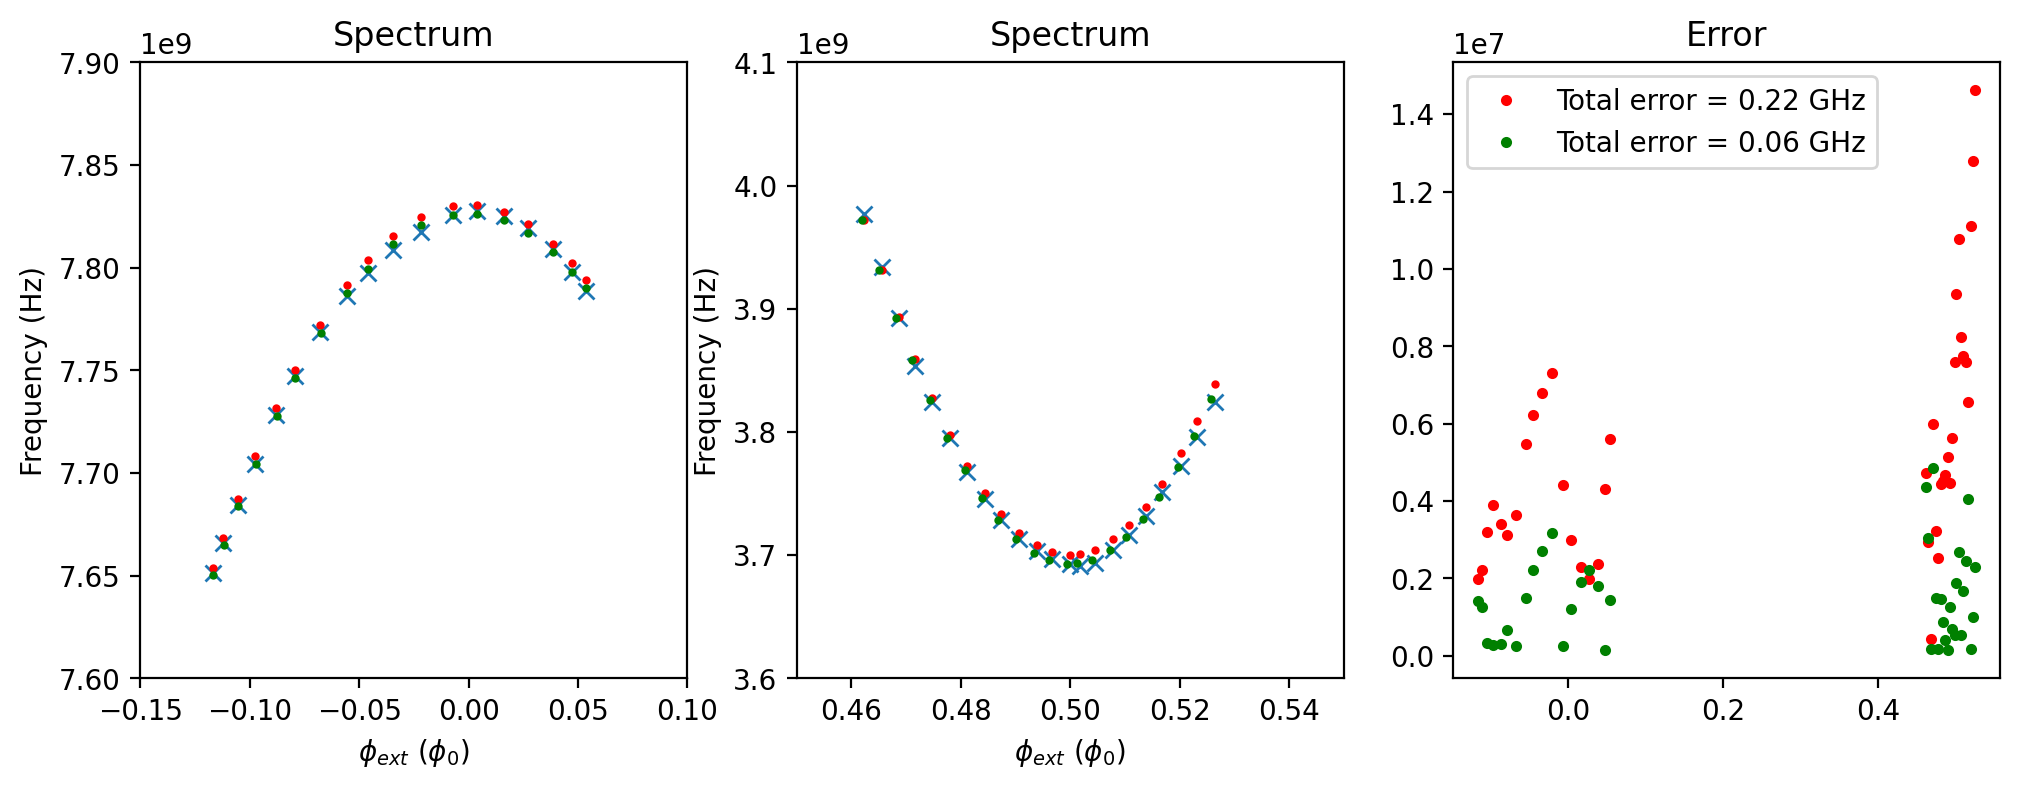

In [42]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([7.6e9, 7.9e9])
ax1.set_xlim([-0.15,0.1])
ax2.set_ylim([3.6e9, 4.1e9])
ax2.set_xlim([0.45, 0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.', label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.', label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz')
ax3.legend()

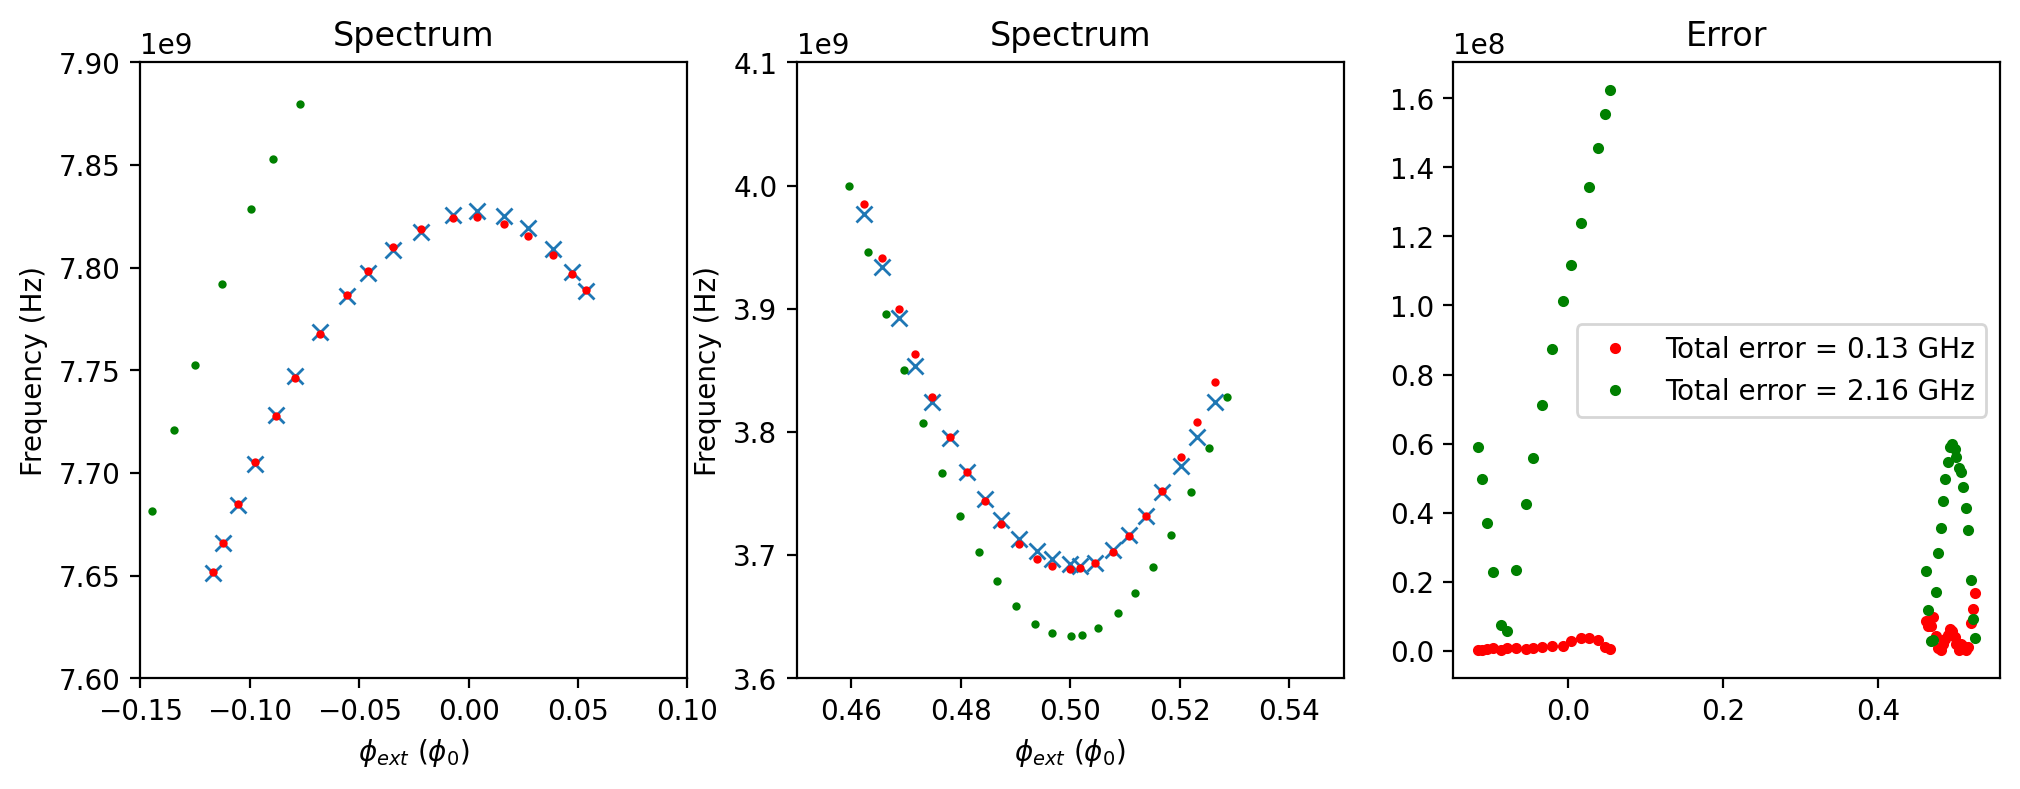

# Resonator 1 

In [368]:
experiment_name = 'resonator_1'
load = False

### Load data

In [369]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

## Define cost function

In [370]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [379]:
CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
_, _, _, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

C_int = 500
I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 13
crossing_index_2  = 10
LR_1, CR_1 = sq_ext.ωR_to_LR_CR(6.495, LR=LR_1)

parameter_names = ['C_int', 'CR_1', 'LR_1', 'Δ_1',  'I0_guess', 'I_origin_guess' ]

parameters_guess = [C_int, CR_1, LR_1, Δ_1,  I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1,EJ_1, nmax_r, nmax_f ])
bounds= ((10,1000), (2,25),(30,170),(0.85,1.05),(I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))

## Plot guess to check

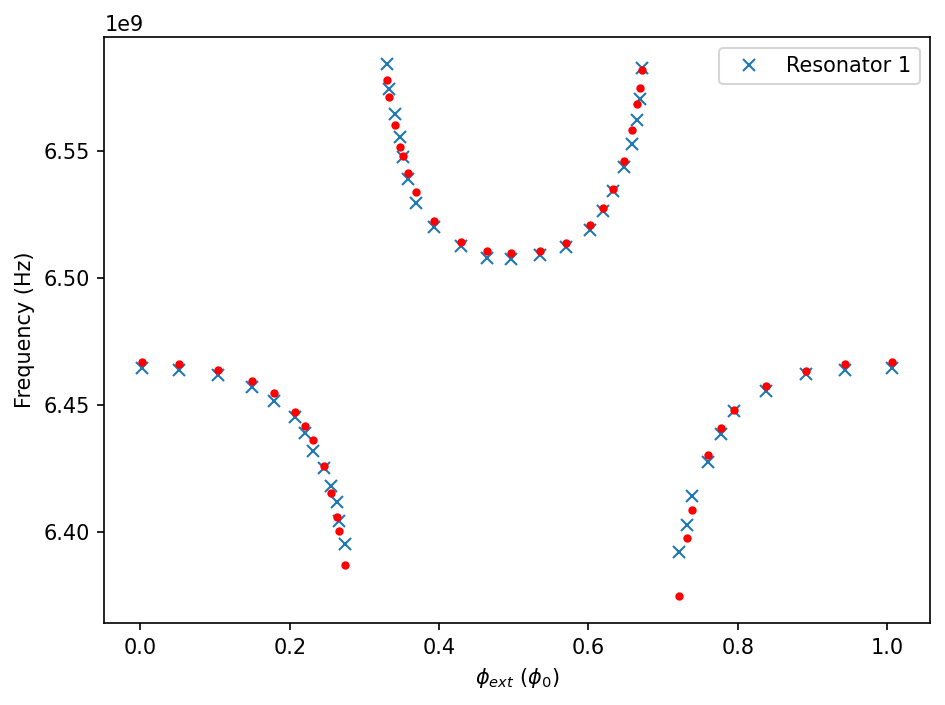

In [380]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [381]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, tol = 1e-12).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.000821960046005217
0.000821960045899984
0.000821959852292111
0.0008219600324989249
0.0008219601212528524
0.0008220109342223887
0.000821822170330263
0.013286849767150045
0.01328684976651878
0.01328684705139253
0.013286849582357914
0.013286850229476508
0.013284579897613693
0.013288562339772998
0.0004967727428616601
0.0004967727428017307
0.0004967721472671397
0.0004967727028991638
0.0004967727913620972
0.0004965831253388791
0.0004964966194613068
0.007621391359253997
0.007621391358938123
0.0076213904762865185
0.007621391298559465
0.007621391594400698
0.007623438088608522
0.0076259051361478
0.0004591116463731113
0.0004591116463172879
0.0004591110363673081
0.0004591116054726237
0.0004591116926543667
0.00045906282154396826
0.0004591178911999383
0.0004546214496346914
0.00045462144957628565
0.00045462088018771246
0.000454621411419829
0.000454621496793335
0.0004545933002519123
0.00045463739094383745
0.00044111180186239945
0.00044111180180518475
0.00044111127996268286
0.00044111176680444616
0.0

In [382]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int = 500.000
CR_1 = 6.314
LR_1 = 95.101
Δ_1 = 0.944
I0_guess = 0.003
I_origin_guess = -0.002


Optimized parameters 

C_int = 500.000
CR_1 = 6.321
LR_1 = 95.101
Δ_1 = 0.927
I0_guess = 0.003
I_origin_guess = -0.002


## Plot fits and errors

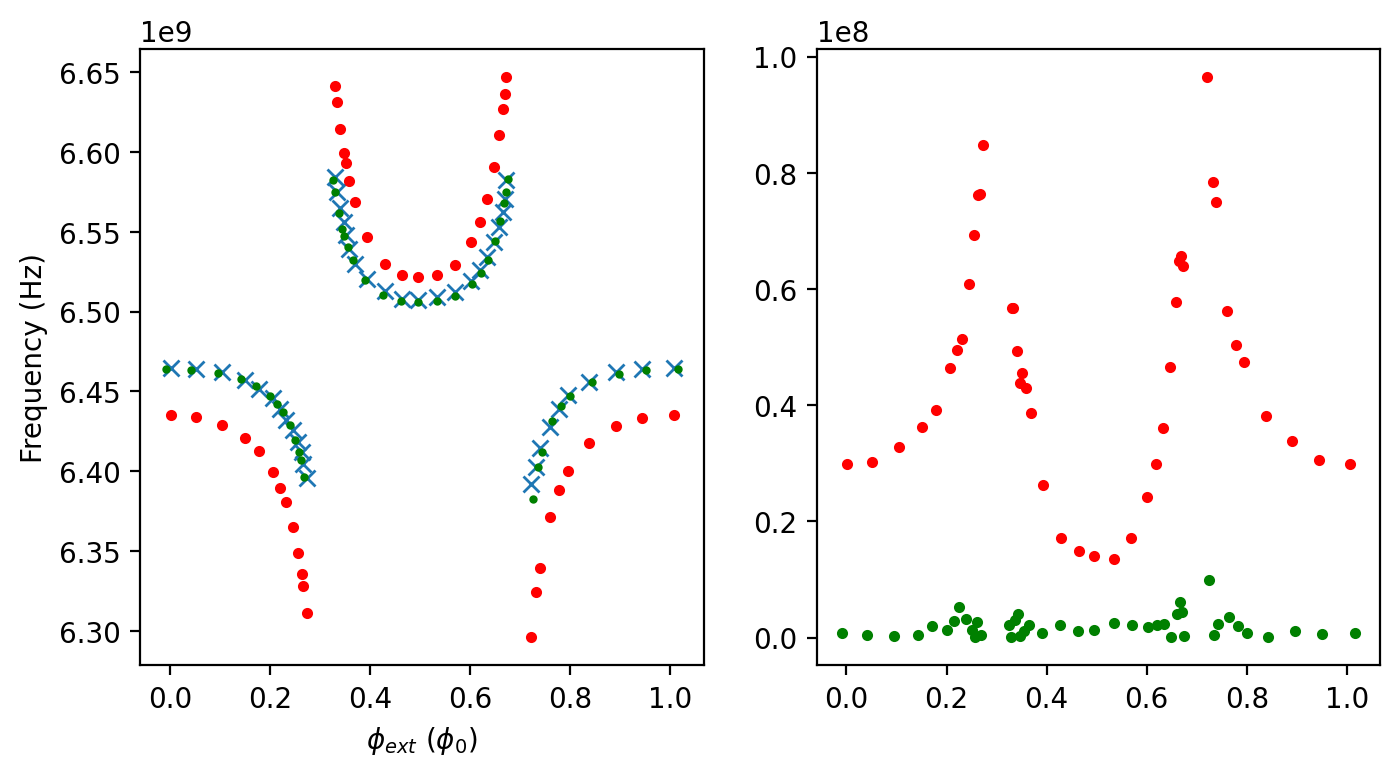

In [376]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.')
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.')

# Qubit 1 and Resonator 1

In [97]:
experiment_name = 'resonator_and_qubit_1'
load = False


### Load spectral data and theoretical model

In [92]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1')

In [93]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [94]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_R = 13
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15
C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, C_int, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'C_int', 'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.9, I0_F_1*1.1), (I_origin_F_1*1.1, I_origin_F_1*0.9),
          (10, 1000), (2,25), (30,170), (0,2), (I0_R_1*0.9, I0_R_1*1.1), (I_origin_R_1*1.1, I_origin_R_1*0.9))

### Plot guess to check

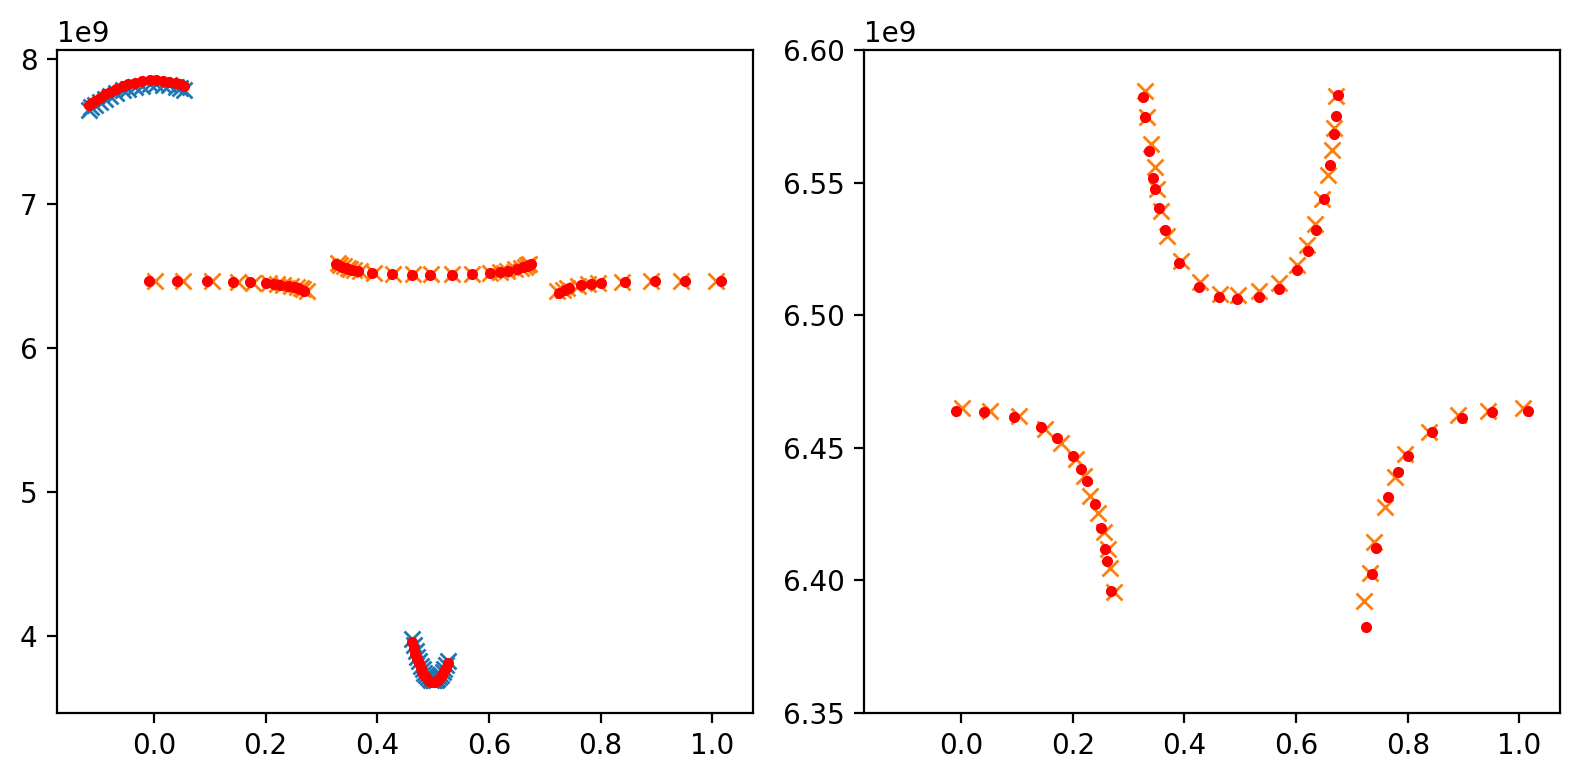

In [96]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.35e9,6.6e9])
fig.tight_layout()

### Optimize or load previous optimization

In [98]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, tol = 1e-12).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.02063714774623326
0.020637146926610547
0.020637147816784107
0.02063715377639191
0.020635476280142163
0.020629289715689822
0.020637147745554373
0.02063714764831773
0.020637147735572677
0.0206371482307637
0.020637147737779846
0.02063714781648748
31.578008288343245
31.578008255002167
31.578008246931823
31.578008253467114
31.57717157780109
31.575855666935354
31.578008288363755
31.578008297555442
31.57800828909076
31.57800827088843
31.578001348014414
31.578009507374503
0.017053346853129155
0.017053345991943615
0.017053346752442484
0.017053351999419347
0.017054808211923893
0.017052365653650682
0.017053346852510226
0.017053346869547775
0.017053346850541672
0.01705334727554204
0.017053372030002907
0.01705335560242069
0.01331868536349586
0.013318684463402055
0.013318685009729091
0.013318689043457115
0.013323153254614825
0.01332456443173137
0.013318685362989734
0.013318685623341441
0.013318685377876576
0.013318685685590224
0.013318763326355558
0.013318710866141722
0.009189793320271695
0.009189

In [99]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 26.924
LF_1 = 26.523
EJ_1 = 5.404
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int = 500.000
CR_1 = 6.321
LR_1 = 95.101
Δ_1 = 0.927
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 26.969
LF_1 = 26.559
EJ_1 = 5.346
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int = 500.000
CR_1 = 6.318
LR_1 = 95.101
Δ_1 = 0.920
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6350000000.0, 6600000000.0)

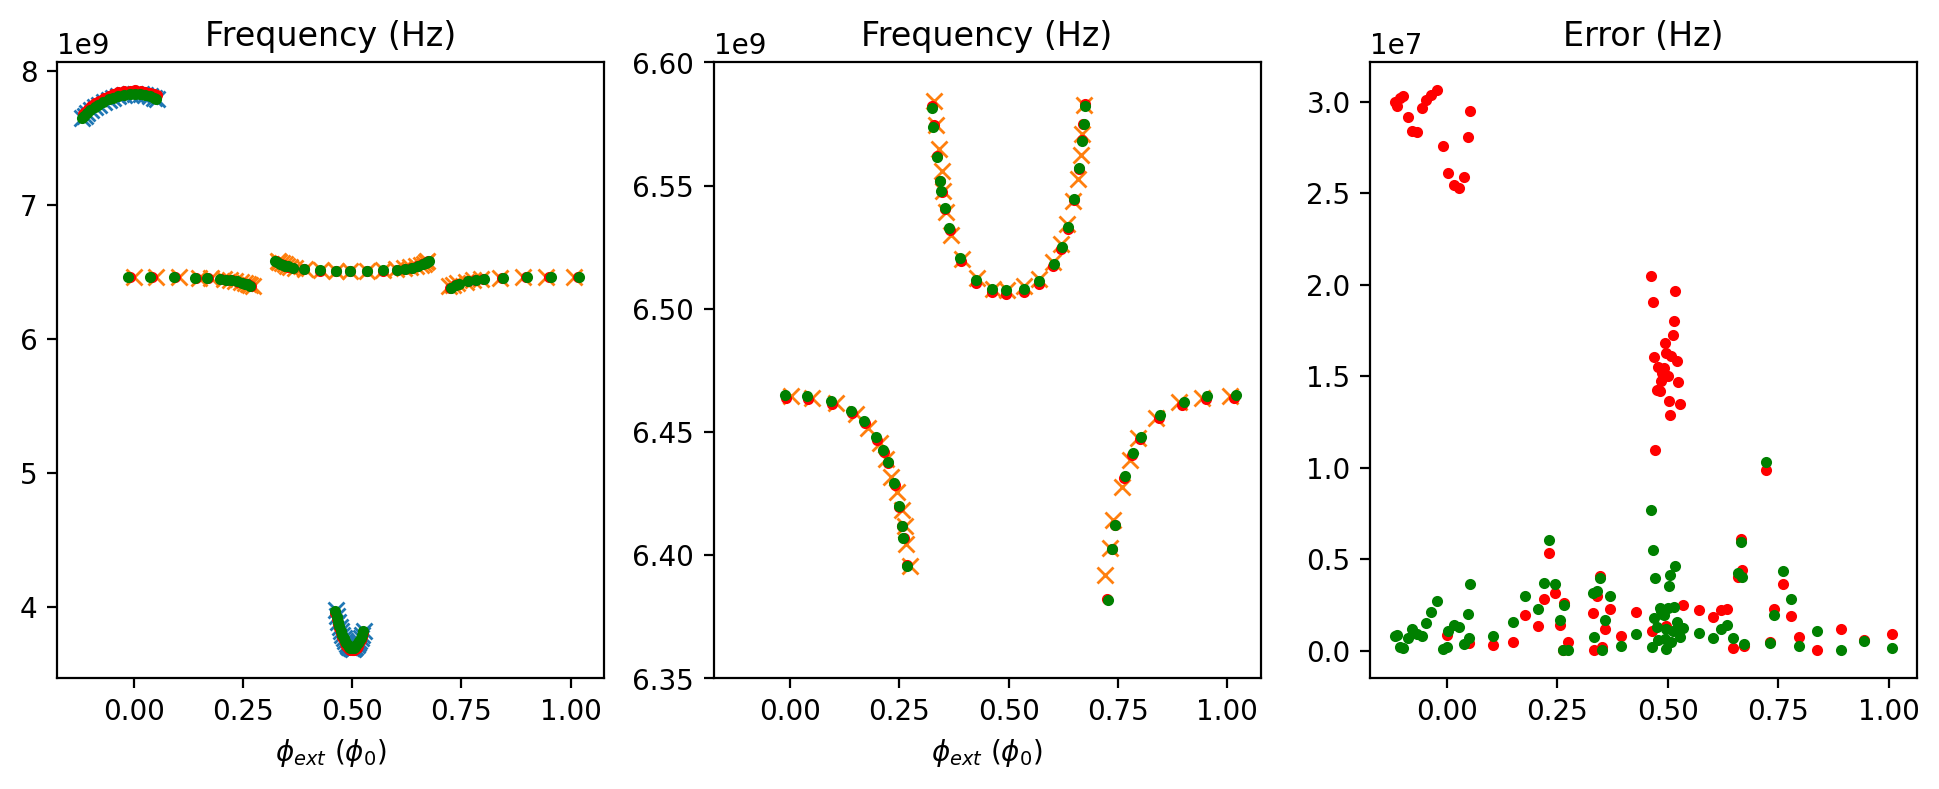

In [101]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.')
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.')
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.')
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.')
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.35e9,6.6e9])
